In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
spark = SparkSession.builder.appName("Accident-Patterns").getOrCreate()


In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/Crashes_2.csv")
df2 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/Persons_2.csv")
df3 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/Vehicles_2.csv")

In [0]:
df1.printSchema()

root
 |-- CRASH DATE: string (nullable = true)
 |-- CRASH TIME: string (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- ZIP CODE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- ON STREET NAME: string (nullable = true)
 |-- CROSS STREET NAME: string (nullable = true)
 |-- OFF STREET NAME: string (nullable = true)
 |-- NUMBER OF PERSONS INJURED: string (nullable = true)
 |-- NUMBER OF PERSONS KILLED: string (nullable = true)
 |-- NUMBER OF PEDESTRIANS INJURED: string (nullable = true)
 |-- NUMBER OF PEDESTRIANS KILLED: string (nullable = true)
 |-- NUMBER OF CYCLIST INJURED: string (nullable = true)
 |-- NUMBER OF CYCLIST KILLED: string (nullable = true)
 |-- NUMBER OF MOTORIST INJURED: string (nullable = true)
 |-- NUMBER OF MOTORIST KILLED: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 1: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 2: string (nu

In [0]:
df2.printSchema()

root
 |-- UNIQUE_ID: string (nullable = true)
 |-- COLLISION_ID: string (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- PERSON_ID: string (nullable = true)
 |-- PERSON_TYPE: string (nullable = true)
 |-- PERSON_INJURY: string (nullable = true)
 |-- VEHICLE_ID: string (nullable = true)
 |-- PERSON_AGE: string (nullable = true)
 |-- EJECTION: string (nullable = true)
 |-- EMOTIONAL_STATUS: string (nullable = true)
 |-- BODILY_INJURY: string (nullable = true)
 |-- POSITION_IN_VEHICLE: string (nullable = true)
 |-- SAFETY_EQUIPMENT: string (nullable = true)
 |-- PED_LOCATION: string (nullable = true)
 |-- PED_ACTION: string (nullable = true)
 |-- COMPLAINT: string (nullable = true)
 |-- PED_ROLE: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_1: string (nullable = true)
 |-- CONTRIBUTING_FACTOR_2: string (nullable = true)
 |-- PERSON_SEX: string (nullable = true)



In [0]:
df3.printSchema()

root
 |-- UNIQUE_ID: string (nullable = true)
 |-- COLLISION_ID: string (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- VEHICLE_ID: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_MODEL: string (nullable = true)
 |-- VEHICLE_YEAR: string (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: string (nullable = true)
 |-- DRIVER_SEX: string (nullable = true)
 |-- DRIVER_LICENSE_STATUS: string (nullable = true)
 |-- DRIVER_LICENSE_JURISDICTION: string (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- VEHICLE_DAMAGE_1: string (nullable = true)
 |-- VEHICLE_DAMAGE_2: string (nullable = true)
 |-- VEHICLE_DAMAGE_3: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMAGE:

In [0]:
df1.summary()

Out[6]: DataFrame[summary: string, CRASH DATE: string, CRASH TIME: string, BOROUGH: string, ZIP CODE: string, LATITUDE: string, LONGITUDE: string, LOCATION: string, ON STREET NAME: string, CROSS STREET NAME: string, OFF STREET NAME: string, NUMBER OF PERSONS INJURED: string, NUMBER OF PERSONS KILLED: string, NUMBER OF PEDESTRIANS INJURED: string, NUMBER OF PEDESTRIANS KILLED: string, NUMBER OF CYCLIST INJURED: string, NUMBER OF CYCLIST KILLED: string, NUMBER OF MOTORIST INJURED: string, NUMBER OF MOTORIST KILLED: string, CONTRIBUTING FACTOR VEHICLE 1: string, CONTRIBUTING FACTOR VEHICLE 2: string, CONTRIBUTING FACTOR VEHICLE 3: string, CONTRIBUTING FACTOR VEHICLE 4: string, CONTRIBUTING FACTOR VEHICLE 5: string, COLLISION_ID: string, VEHICLE TYPE CODE 1: string, VEHICLE TYPE CODE 2: string, VEHICLE TYPE CODE 3: string, VEHICLE TYPE CODE 4: string, VEHICLE TYPE CODE 5: string]

In [0]:
df2.summary()

Out[7]: DataFrame[summary: string, UNIQUE_ID: string, COLLISION_ID: string, CRASH_DATE: string, CRASH_TIME: string, PERSON_ID: string, PERSON_TYPE: string, PERSON_INJURY: string, VEHICLE_ID: string, PERSON_AGE: string, EJECTION: string, EMOTIONAL_STATUS: string, BODILY_INJURY: string, POSITION_IN_VEHICLE: string, SAFETY_EQUIPMENT: string, PED_LOCATION: string, PED_ACTION: string, COMPLAINT: string, PED_ROLE: string, CONTRIBUTING_FACTOR_1: string, CONTRIBUTING_FACTOR_2: string, PERSON_SEX: string]

In [0]:
df3.summary()

Out[8]: DataFrame[summary: string, UNIQUE_ID: string, COLLISION_ID: string, CRASH_DATE: string, CRASH_TIME: string, VEHICLE_ID: string, STATE_REGISTRATION: string, VEHICLE_TYPE: string, VEHICLE_MAKE: string, VEHICLE_MODEL: string, VEHICLE_YEAR: string, TRAVEL_DIRECTION: string, VEHICLE_OCCUPANTS: string, DRIVER_SEX: string, DRIVER_LICENSE_STATUS: string, DRIVER_LICENSE_JURISDICTION: string, PRE_CRASH: string, POINT_OF_IMPACT: string, VEHICLE_DAMAGE: string, VEHICLE_DAMAGE_1: string, VEHICLE_DAMAGE_2: string, VEHICLE_DAMAGE_3: string, PUBLIC_PROPERTY_DAMAGE: string, PUBLIC_PROPERTY_DAMAGE_TYPE: string, CONTRIBUTING_FACTOR_1: string, CONTRIBUTING_FACTOR_2: string]

In [0]:
df3.where(F.col("CRASH_TIME").isNull()).count()

Out[9]: 0

In [0]:
df3.count()

Out[10]: 4169890

In [0]:
df3.where(F.col("UNIQUE_ID").isNull()).count()

Out[11]: 0

In [0]:
df3.select("CRASH_TIME").show(10)

+----------+
|CRASH_TIME|
+----------+
|      9:03|
|      8:15|
|     17:18|
|     20:34|
|     21:15|
|     17:35|
|     13:15|
|     12:39|
|     11:20|
|     18:12|
+----------+
only showing top 10 rows



In [0]:
df3=df3.withColumn("CRASH_TIME",F.to_timestamp(df3["CRASH_TIME"],"H:mm"))

In [0]:
df3.printSchema()

root
 |-- UNIQUE_ID: string (nullable = true)
 |-- COLLISION_ID: string (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: timestamp (nullable = true)
 |-- VEHICLE_ID: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_MODEL: string (nullable = true)
 |-- VEHICLE_YEAR: string (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: string (nullable = true)
 |-- DRIVER_SEX: string (nullable = true)
 |-- DRIVER_LICENSE_STATUS: string (nullable = true)
 |-- DRIVER_LICENSE_JURISDICTION: string (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- VEHICLE_DAMAGE_1: string (nullable = true)
 |-- VEHICLE_DAMAGE_2: string (nullable = true)
 |-- VEHICLE_DAMAGE_3: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMA

In [0]:
df3.where(F.col("CRASH_DATE").isNull()).count()

Out[15]: 0

In [0]:
df3.select(F.col("CRASH_DATE")).show()

+----------+
|CRASH_DATE|
+----------+
|09/07/2012|
|09/23/2019|
|10/02/2015|
|10/04/2015|
|04/25/2013|
|05/02/2016|
|10/24/2019|
|08/18/2016|
|07/16/2013|
|11/26/2012|
|07/22/2016|
|08/01/2015|
|08/13/2016|
|10/21/2019|
|06/06/2020|
|08/11/2012|
|09/08/2016|
|04/09/2013|
|04/01/2016|
|10/24/2019|
+----------+
only showing top 20 rows



In [0]:
df3=df3.withColumn("CRASH_DATE",F.to_date(df3["CRASH_DATE"],"MM/dd/yyyy"))

In [0]:
df3.printSchema()

root
 |-- UNIQUE_ID: string (nullable = true)
 |-- COLLISION_ID: string (nullable = true)
 |-- CRASH_DATE: date (nullable = true)
 |-- CRASH_TIME: timestamp (nullable = true)
 |-- VEHICLE_ID: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_MODEL: string (nullable = true)
 |-- VEHICLE_YEAR: string (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: string (nullable = true)
 |-- DRIVER_SEX: string (nullable = true)
 |-- DRIVER_LICENSE_STATUS: string (nullable = true)
 |-- DRIVER_LICENSE_JURISDICTION: string (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- VEHICLE_DAMAGE_1: string (nullable = true)
 |-- VEHICLE_DAMAGE_2: string (nullable = true)
 |-- VEHICLE_DAMAGE_3: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMAGE

In [0]:
df4 = df3.select(F.hour(df3["CRASH_TIME"]).alias("CRASH_HOUR")).groupBy("CRASH_HOUR").agg(F.count("*").alias("count")).orderBy("CRASH_HOUR")

In [0]:
df4.show()

+----------+------+
|CRASH_HOUR| count|
+----------+------+
|         0|135760|
|         1| 73940|
|         2| 56769|
|         3| 50187|
|         4| 57337|
|         5| 61984|
|         6| 94426|
|         7|127331|
|         8|229029|
|         9|220788|
|        10|205854|
|        11|214206|
|        12|227588|
|        13|239974|
|        14|277216|
|        15|260210|
|        16|300218|
|        17|292292|
|        18|255612|
|        19|209552|
+----------+------+
only showing top 20 rows



In [0]:
df_hours = df4.toPandas()

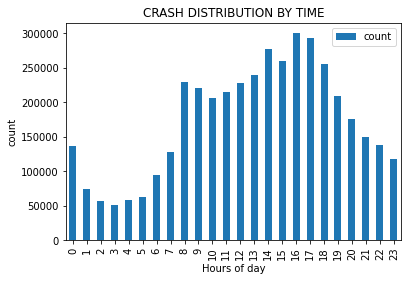

<Figure size 1440x432 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
df_hours.plot(kind = 'bar', x='CRASH_HOUR',y='count')
plt.title("CRASH DISTRIBUTION BY TIME")
plt.xlabel("Hours of day")
plt.ylabel("count")
plt.figure(figsize=(20, 6))
plt.show()


In [0]:
df5 = df3.select(F.month(df3["CRASH_DATE"]).alias("CRASH_MONTH")).groupBy("CRASH_MONTH").agg(F.count("*").alias("count")).orderBy("CRASH_MONTH")

In [0]:
df5.show()

+-----------+------+
|CRASH_MONTH| count|
+-----------+------+
|          1|327429|
|          2|302612|
|          3|339198|
|          4|302739|
|          5|348298|
|          6|351449|
|          7|373188|
|          8|367527|
|          9|366779|
|         10|376818|
|         11|356805|
|         12|357048|
+-----------+------+



In [0]:
df_MONTH = df5.toPandas()

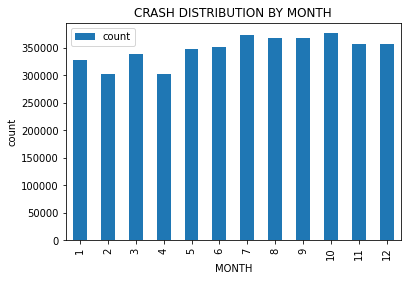

<Figure size 1440x432 with 0 Axes>

In [0]:
df_MONTH.plot(kind = 'bar', x='CRASH_MONTH',y='count')
plt.title("CRASH DISTRIBUTION BY MONTH")
plt.legend()
plt.xlabel("MONTH")
plt.ylabel("count")
plt.figure(figsize=(20, 6))
plt.show()

In [0]:
df3.where(F.col("VEHICLE_TYPE").isNull()).count()

Out[27]: 235350

In [0]:
df3.select(F.col("VEHICLE_TYPE")).distinct().show(truncate=False)

+-----------------------------------+
|VEHICLE_TYPE                       |
+-----------------------------------+
|Station Wagon/Sport Utility Vehicle|
|Flat Bed                           |
|Bike                               |
|PASSENGER VEHICLE                  |
|Motorcycle                         |
|Convertible                        |
|4 dr sedan                         |
|null                               |
|VAN                                |
|TAXI                               |
|Sedan                              |
|Taxi                               |
|LARGE COM VEH(6 OR MORE TIRES)     |
|UNKNOWN                            |
|Box Truck                          |
|PICK-UP TRUCK                      |
|SPORT UTILITY / STATION WAGON      |
|Bus                                |
|OTHER                              |
|Pick-up Truck                      |
+-----------------------------------+
only showing top 20 rows



In [0]:
df_drop = df3.withColumn("VEHICLE_TYPE",F.lower(df3["VEHICLE_TYPE"]))

In [0]:
df3.select(F.col("VEHICLE_TYPE")).distinct().show(truncate=False)

+-----------------------------------+
|VEHICLE_TYPE                       |
+-----------------------------------+
|Station Wagon/Sport Utility Vehicle|
|Flat Bed                           |
|Bike                               |
|PASSENGER VEHICLE                  |
|Motorcycle                         |
|Convertible                        |
|4 dr sedan                         |
|null                               |
|VAN                                |
|TAXI                               |
|Sedan                              |
|Taxi                               |
|LARGE COM VEH(6 OR MORE TIRES)     |
|UNKNOWN                            |
|Box Truck                          |
|PICK-UP TRUCK                      |
|SPORT UTILITY / STATION WAGON      |
|Bus                                |
|OTHER                              |
|Pick-up Truck                      |
+-----------------------------------+
only showing top 20 rows



In [0]:
df_drop = df_drop.filter((F.col("VEHICLE_TYPE") != "null") & (F.col("VEHICLE_TYPE") != "unknown"))

In [0]:
df_drop.select("VEHICLE_TYPE").count()

Out[32]: 3828966

In [0]:
df_drop.select("VEHICLE_TYPE").distinct().show(100,truncate=False)

+-----------------------------------+
|VEHICLE_TYPE                       |
+-----------------------------------+
|trail                              |
|4dsd                               |
|subn                               |
|van                                |
|motorcycle                         |
|fork                               |
|armored truck                      |
|moped                              |
|lift boom                          |
|carry all                          |
|box t                              |
|stake or rack                      |
|e-bike                             |
|open body                          |
|psh                                |
|e-sco                              |
|large com veh(6 or more tires)     |
|pallet                             |
|com                                |
|deliv                              |
|tow truck                          |
|pickup with mounted camper         |
|concrete mixer                     |
|enclosed bo

In [0]:
vehicle_type_mapping = {
    "sedan": "car",
    "suv": "car",
    "convertible": "car",
    "truck": "truck",
    "van": "van",
    "motorcycle": "motorcycle",
    "bus": "bus",
    "station wagon/sport utility vehicle": "car",
    "bike": "bike",
    "passenger vehicle": "bus",
    "pick-up": "truck",
    "taxi": "taxi"

}

In [0]:
df_vehicle=df_drop.select(F.col("VEHICLE_TYPE"))

df_vehicle = df_vehicle.withColumn(
    "GENERAL_VEHICLE_TYPE", 
    F.when(df_vehicle["VEHICLE_TYPE"].isin(*vehicle_type_mapping.keys()), df_vehicle["VEHICLE_TYPE"]).otherwise("others")
)

# Show the DataFrame with the new column
df_vehicle.show(truncate=False)

+-----------------------------------+-----------------------------------+
|VEHICLE_TYPE                       |GENERAL_VEHICLE_TYPE               |
+-----------------------------------+-----------------------------------+
|passenger vehicle                  |passenger vehicle                  |
|station wagon/sport utility vehicle|station wagon/sport utility vehicle|
|taxi                               |taxi                               |
|passenger vehicle                  |passenger vehicle                  |
|passenger vehicle                  |passenger vehicle                  |
|4 dr sedan                         |others                             |
|bus                                |bus                                |
|station wagon/sport utility vehicle|station wagon/sport utility vehicle|
|passenger vehicle                  |passenger vehicle                  |
|passenger vehicle                  |passenger vehicle                  |
|convertible                        |c

In [0]:
df_vehicle.show(50,truncate=False)

+-----------------------------------+-----------------------------------+
|VEHICLE_TYPE                       |GENERAL_VEHICLE_TYPE               |
+-----------------------------------+-----------------------------------+
|passenger vehicle                  |passenger vehicle                  |
|station wagon/sport utility vehicle|station wagon/sport utility vehicle|
|taxi                               |taxi                               |
|passenger vehicle                  |passenger vehicle                  |
|passenger vehicle                  |passenger vehicle                  |
|4 dr sedan                         |others                             |
|bus                                |bus                                |
|station wagon/sport utility vehicle|station wagon/sport utility vehicle|
|passenger vehicle                  |passenger vehicle                  |
|passenger vehicle                  |passenger vehicle                  |
|convertible                        |c

In [0]:
df_vehicle_count = df_vehicle.select(F.col("GENERAL_VEHICLE_TYPE")).groupBy("GENERAL_VEHICLE_TYPE").agg(F.count("*").alias("count")).orderBy("GENERAL_VEHICLE_TYPE")

In [0]:
df_vehicle_count.show()

+--------------------+-------+
|GENERAL_VEHICLE_TYPE|  count|
+--------------------+-------+
|                bike|  47157|
|                 bus|  67491|
|         convertible|   6513|
|          motorcycle|  23451|
|              others| 818521|
|   passenger vehicle| 770753|
|             pick-up|      7|
|               sedan|1042336|
|station wagon/spo...| 830944|
|                 suv|     24|
|                taxi| 152554|
|               truck|    660|
|                 van|  68555|
+--------------------+-------+



In [0]:
df_vehicle_count = df_vehicle_count.toPandas()

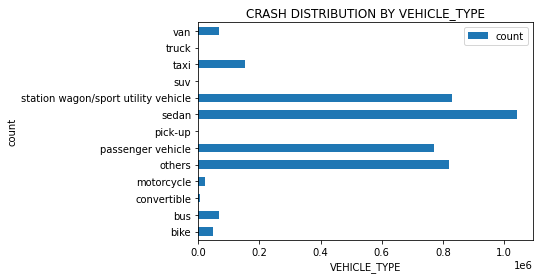

<Figure size 1440x432 with 0 Axes>

In [0]:
df_vehicle_count.plot(kind = 'barh', x='GENERAL_VEHICLE_TYPE',y='count')
plt.title("CRASH DISTRIBUTION BY VEHICLE_TYPE")
plt.xlabel("VEHICLE_TYPE")
plt.ylabel("count")
plt.figure(figsize=(20, 6))
plt.show()

In [0]:
#doing top 10 for better values
top_10_vehicles = df_drop.groupBy("VEHICLE_TYPE").count()

In [0]:
top_10_vehicles = top_10_vehicles.orderBy(F.col("count").desc()).limit(20)
top_10_vehicles.show(truncate=False)

+-----------------------------------+-------+
|VEHICLE_TYPE                       |count  |
+-----------------------------------+-------+
|sedan                              |1042336|
|station wagon/sport utility vehicle|830944 |
|passenger vehicle                  |770753 |
|sport utility / station wagon      |337927 |
|taxi                               |152554 |
|pick-up truck                      |92187  |
|4 dr sedan                         |73577  |
|van                                |68555  |
|bus                                |67491  |
|box truck                          |53663  |
+-----------------------------------+-------+



In [0]:
top_10_vehicles =top_10_vehicles.toPandas()

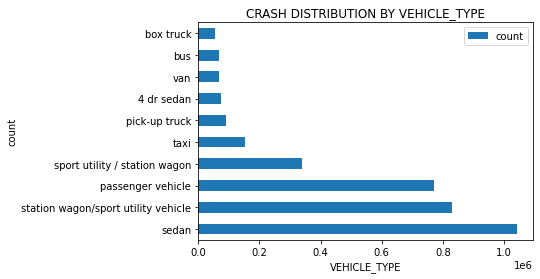

<Figure size 1440x432 with 0 Axes>

In [0]:
top_10_vehicles.plot(kind = 'barh', x='VEHICLE_TYPE',y='count')
plt.title("CRASH DISTRIBUTION BY VEHICLE_TYPE")
plt.xlabel("VEHICLE_TYPE")
plt.ylabel("count")
plt.figure(figsize=(20, 6))
plt.show()

In [0]:
#pre_crash

In [0]:
df3.where(F.col("PRE_CRASH").isNull()).count()

Out[46]: 920209

In [0]:
df_precrash = df3.filter(F.col("PRE_CRASH").isNotNull())
df_precrash.count()

Out[47]: 3249681

In [0]:
df_precrash.select(F.col("PRE_CRASH")).distinct().count()

Out[48]: 19

In [0]:
df_precrash.select(F.col("PRE_CRASH")).distinct().show()

+--------------------+
|           PRE_CRASH|
+--------------------+
|Making Right Turn...|
|             Merging|
| Starting in Traffic|
|             Passing|
|       Making U Turn|
|Starting from Par...|
|  Stopped in Traffic|
|              Other*|
|             Backing|
|Making Left Turn ...|
|    Making Left Turn|
|Entering Parked P...|
|Going Straight Ahead|
|      Police Pursuit|
|      Changing Lanes|
| Slowing or Stopping|
|Avoiding Object i...|
|              Parked|
|   Making Right Turn|
+--------------------+



In [0]:
df_pre_crash_count = df_precrash.select(F.col("PRE_CRASH")).groupBy("PRE_CRASH").agg(F.count("*").alias("count")).orderBy("PRE_CRASH")

In [0]:
df_pre_crash_count.show()

+--------------------+-------+
|           PRE_CRASH|  count|
+--------------------+-------+
|Avoiding Object i...|   3558|
|             Backing| 110951|
|      Changing Lanes|  95346|
|Entering Parked P...|  40763|
|Going Straight Ahead|1590661|
|    Making Left Turn| 200217|
|Making Left Turn ...|    998|
|   Making Right Turn| 164672|
|Making Right Turn...|    892|
|       Making U Turn|  28536|
|             Merging|  53019|
|              Other*|  34882|
|              Parked| 558116|
|             Passing|  34310|
|      Police Pursuit|   1350|
| Slowing or Stopping| 115326|
|Starting from Par...|  53230|
| Starting in Traffic|  12961|
|  Stopped in Traffic| 149893|
+--------------------+-------+



In [0]:
pd_pre_crash_count = df_pre_crash_count.toPandas()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


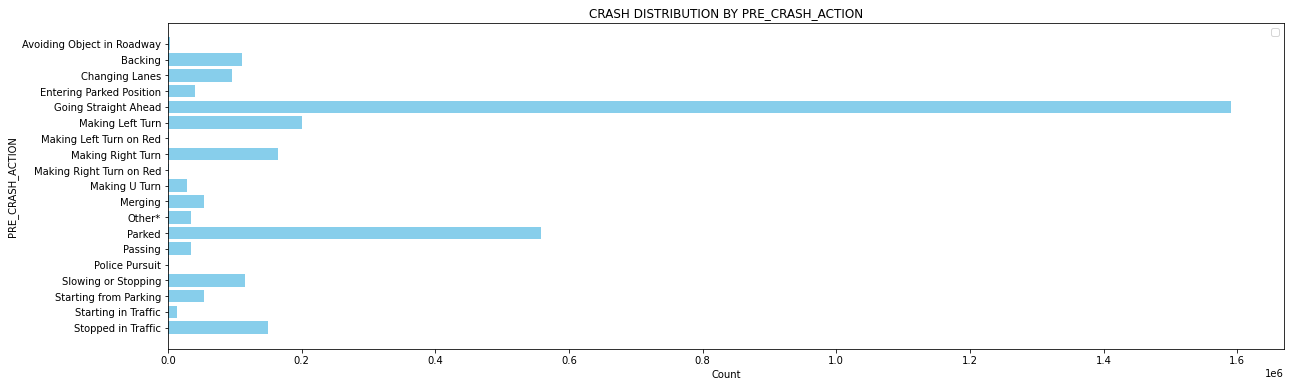

In [0]:
pd_pre_crash_count['count'] = pd_pre_crash_count['count'].astype(int)
plt.figure(figsize=(20, 6))  
plt.barh(pd_pre_crash_count['PRE_CRASH'] , pd_pre_crash_count['count'] , color='skyblue')
plt.title("CRASH DISTRIBUTION BY PRE_CRASH_ACTION")
plt.xlabel("Count")
plt.ylabel("PRE_CRASH_ACTION")
plt.gca().invert_yaxis()
plt.legend()  
plt.show()


In [0]:
df1.printSchema()

root
 |-- CRASH DATE: string (nullable = true)
 |-- CRASH TIME: string (nullable = true)
 |-- BOROUGH: string (nullable = true)
 |-- ZIP CODE: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- LOCATION: string (nullable = true)
 |-- ON STREET NAME: string (nullable = true)
 |-- CROSS STREET NAME: string (nullable = true)
 |-- OFF STREET NAME: string (nullable = true)
 |-- NUMBER OF PERSONS INJURED: string (nullable = true)
 |-- NUMBER OF PERSONS KILLED: string (nullable = true)
 |-- NUMBER OF PEDESTRIANS INJURED: string (nullable = true)
 |-- NUMBER OF PEDESTRIANS KILLED: string (nullable = true)
 |-- NUMBER OF CYCLIST INJURED: string (nullable = true)
 |-- NUMBER OF CYCLIST KILLED: string (nullable = true)
 |-- NUMBER OF MOTORIST INJURED: string (nullable = true)
 |-- NUMBER OF MOTORIST KILLED: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 1: string (nullable = true)
 |-- CONTRIBUTING FACTOR VEHICLE 2: string (nu

In [0]:
df1.where(F.col("BOROUGH").isNull()).count()

Out[3]: 646431

In [0]:
df_pk = df1.filter(F.col("BOROUGH").isNotNull())
df_pk.count()

Out[4]: 1431168

In [0]:
df_pk.where(F.col("NUMBER OF PERSONS INJURED").isNull()).count()

Out[5]: 11

In [0]:
df_pk = df_pk.filter(F.col("NUMBER OF PERSONS INJURED").isNotNull())
df_pk.count()

Out[6]: 1431157

In [0]:
injuries_by_borough = df_pk.groupBy('BOROUGH').agg(F.sum('NUMBER OF PERSONS INJURED').alias('Total Persons Injured'))
injuries_by_borough.show()

+-------------+---------------------+
|      BOROUGH|Total Persons Injured|
+-------------+---------------------+
|       QUEENS|             115539.0|
|     BROOKLYN|             150695.0|
|        BRONX|              69285.0|
|    MANHATTAN|              67467.0|
|STATEN ISLAND|              17174.0|
+-------------+---------------------+



In [0]:
injuries_by_borough= injuries_by_borough.toPandas()

<Figure size 720x576 with 0 Axes>

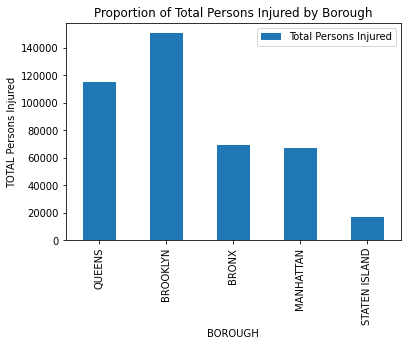

In [0]:
plt.figure(figsize=(10, 8))
injuries_by_borough.plot(kind='bar', x='BOROUGH', y='Total Persons Injured')
plt.title("Proportion of Total Persons Injured by Borough")
plt.xlabel("BOROUGH")
plt.ylabel("TOTAL Persons Injured")
plt.show()

In [0]:
df_pk.where(F.col("NUMBER OF PERSONS KILLED").isNull()).count()

Out[62]: 16

In [0]:
df_pk = df_pk.filter(F.col("NUMBER OF PERSONS KILLED").isNotNull())
df_pk.count()

Out[15]: 1431141

In [0]:
killed_by_borough = df_pk.groupBy('BOROUGH').agg(F.sum('NUMBER OF PERSONS KILLED').alias('Total Persons Killed'))
killed_by_borough.show()

+-------------+--------------------+
|      BOROUGH|Total Persons Killed|
+-------------+--------------------+
|       QUEENS|               528.0|
|     BROOKLYN|               625.0|
|        BRONX|               275.0|
|    MANHATTAN|               330.0|
|STATEN ISLAND|                95.0|
+-------------+--------------------+



In [0]:
killed_by_borough=killed_by_borough.toPandas()

In [0]:
j = killed_by_borough.join(injuries_by_borough, "BOROUGH")

In [0]:
j.show()

+-------------+--------------------+---------------------+
|      BOROUGH|Total Persons Killed|Total Persons Injured|
+-------------+--------------------+---------------------+
|       QUEENS|               528.0|             115539.0|
|     BROOKLYN|               625.0|             150695.0|
|        BRONX|               275.0|              69285.0|
|    MANHATTAN|               330.0|              67467.0|
|STATEN ISLAND|                95.0|              17174.0|
+-------------+--------------------+---------------------+



In [0]:
j =j.toPandas()

In [0]:
j.head()

,BOROUGH,Total Persons Killed,Total Persons Injured
0,QUEENS,528.0,115539.0
1,BROOKLYN,625.0,150695.0
2,BRONX,275.0,69285.0
3,MANHATTAN,330.0,67467.0
4,STATEN ISLAND,95.0,17174.0


<Figure size 720x432 with 0 Axes>

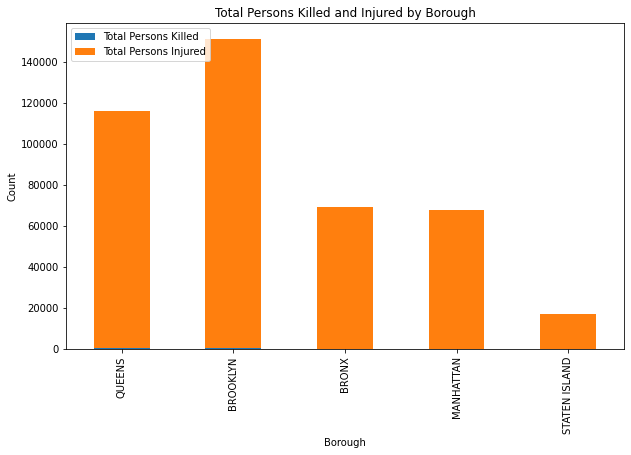

In [0]:

import pandas as pd
data = pd.DataFrame({
    'BOROUGH': ['QUEENS', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'STATEN ISLAND'],
    'Total Persons Killed': [528, 625, 275, 330, 95],
    'Total Persons Injured': [115539, 150695, 69285, 67467, 17174]
})

plt.figure(figsize=(10, 6))

# Plot stacked bar chart
data.plot(kind='bar', x='BOROUGH', stacked=True, figsize=(10, 6))

plt.title('Total Persons Killed and Injured by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')

# Show legend
plt.legend(["Total Persons Killed", "Total Persons Injured"], loc="upper left")

plt.show()


<Figure size 1440x432 with 0 Axes>

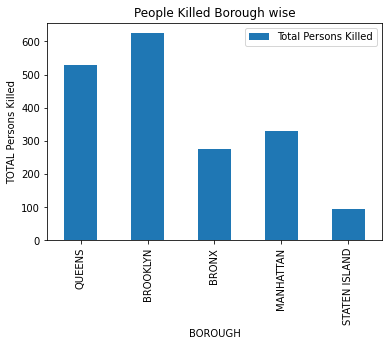

In [0]:
plt.figure(figsize=(20, 6))  
killed_by_borough.plot(kind='bar', x='BOROUGH', y='Total Persons Killed')
plt.title("People Killed Borough wise")
plt.xlabel("BOROUGH")
plt.ylabel("TOTAL Persons Killed")
plt.legend()  
plt.show()

In [0]:
df_pk.where(F.col("NUMBER OF PEDESTRIANS INJURED").isNull()).count()

Out[67]: 0

In [0]:
df_pk.where(F.col("NUMBER OF CYCLIST INJURED").isNull()).count()

Out[68]: 0

In [0]:
df_pk.where(F.col("NUMBER OF MOTORIST INJURED").isNull()).count()

Out[69]: 0

In [0]:
injured_counts = df_pk.agg(
    F.sum("NUMBER OF PEDESTRIANS INJURED").alias("Pedestrians Injured"),
    F.sum("NUMBER OF CYCLIST INJURED").alias("Cyclists Injured"),
    F.sum("NUMBER OF MOTORIST INJURED").alias("Motorists Injured"))

In [0]:
injured_counts.show()

+-------------------+----------------+-----------------+
|Pedestrians Injured|Cyclists Injured|Motorists Injured|
+-------------------+----------------+-----------------+
|            93735.0|         43118.0|         277686.0|
+-------------------+----------------+-----------------+



In [0]:
injured_counts = injured_counts.toPandas()

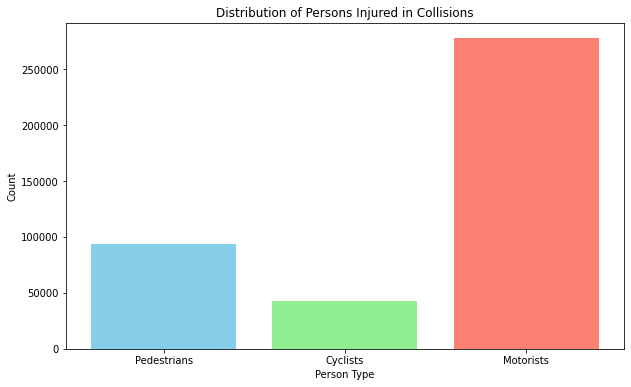

In [0]:
categories = ["Pedestrians", "Cyclists", "Motorists"]
counts = [93735, 43118, 277686]
colors = ["skyblue", "lightgreen", "salmon"]  # Specify colors for each category

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=colors)
plt.title("Distribution of Persons Injured in Collisions")
plt.xlabel("Person Type")
plt.ylabel("Count")
plt.show()

In [0]:
df_pk.where(F.col("NUMBER OF PEDESTRIANS KILLED").isNull()).count()

Out[74]: 0

In [0]:
df_pk.where(F.col("NUMBER OF CYCLIST KILLED").isNull()).count()

Out[75]: 0

In [0]:
df_pk.where(F.col("NUMBER OF MOTORIST KILLED").isNull()).count()

Out[76]: 0

In [0]:
injured_killed = df_pk.agg(
    F.sum("NUMBER OF PEDESTRIANS KILLED").alias("Pedestrians Killed"),
    F.sum("NUMBER OF CYCLIST KILLED").alias("Cyclists Killed"),
    F.sum("NUMBER OF MOTORIST KILLED").alias("Motorists Killed"))

In [0]:
injured_killed.show()

+------------------+---------------+----------------+
|Pedestrians Killed|Cyclists Killed|Motorists Killed|
+------------------+---------------+----------------+
|            1020.0|          170.0|           629.0|
+------------------+---------------+----------------+



In [0]:
injured_killed_pd = injured_killed.toPandas()

categories = ["Pedestrians", "Cyclists", "Motorists"]
counts = [1020, 170, 629]
# Plotting the bar graph
plt.figure(figsize=(10, 6))
injured_killed_pd.plot(kind='bar', ax=plt.gca())
plt.title("Distribution of Persons Killed in Collisions")
plt.xlabel("Person Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [0]:
df3.where(F.col("CONTRIBUTING_FACTOR_1").isNull()).count()

Out[80]: 147345

In [0]:
df3.where(F.col("CONTRIBUTING_FACTOR_2").isNull()).count()

Out[81]: 1686870

In [0]:
df3.where(F.col("CONTRIBUTING_FACTOR_1").isNotNull() & F.col("CONTRIBUTING_FACTOR_2").isNull() ).count()
df3.where(F.col("CONTRIBUTING_FACTOR_1").isNull() & F.col("CONTRIBUTING_FACTOR_2").isNotNull() ).count()

Out[82]: 0

In [0]:
df3_filtered = df3.filter(F.col("CONTRIBUTING_FACTOR_1").isNotNull())

In [0]:
df3_filtered.where(F.col("CONTRIBUTING_FACTOR_1").isNull()).count()

Out[84]: 0

In [0]:
df3_filtered.select(F.col("CONTRIBUTING_FACTOR_1"),F.col("CONTRIBUTING_FACTOR_2")).where(F.col("CONTRIBUTING_FACTOR_1")== F.col("CONTRIBUTING_FACTOR_2")).count()

Out[89]: 1409453

In [0]:
df3_filtered = df3_filtered.withColumn("CONTRIBUTING_FACTOR_2", 
                                       F.when(F.col("CONTRIBUTING_FACTOR_1") == F.col("CONTRIBUTING_FACTOR_2"), 
                                            None).otherwise(F.col("CONTRIBUTING_FACTOR_2")))

In [0]:
df3_filtered.select(F.col("CONTRIBUTING_FACTOR_1"),F.col("CONTRIBUTING_FACTOR_2")).where(F.col("CONTRIBUTING_FACTOR_1")== F.col("CONTRIBUTING_FACTOR_2")).count()

Out[91]: 0

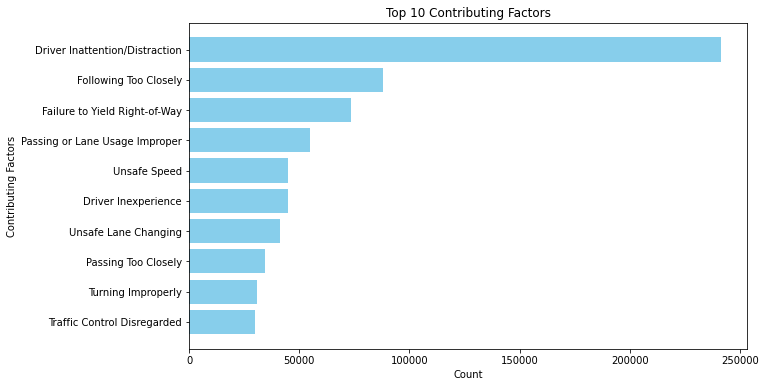

In [0]:
from pyspark.sql.functions import explode, array

from pyspark.sql.functions import explode, array, col

# Filter out None values in CONTRIBUTING_FACTOR_1 and CONTRIBUTING_FACTOR_2 columns
filtered_factors = df3_filtered.filter(col("CONTRIBUTING_FACTOR_1").isNotNull() & col("CONTRIBUTING_FACTOR_2").isNotNull())
filtered_factors = df3_filtered.filter((col("CONTRIBUTING_FACTOR_1") != "Unspecified") & (col("CONTRIBUTING_FACTOR_2") != "Unspecified"))

# Stack CONTRIBUTING_FACTOR_1 and CONTRIBUTING_FACTOR_2 vertically
stacked_factors = filtered_factors.select(explode(array("CONTRIBUTING_FACTOR_1", "CONTRIBUTING_FACTOR_2")).alias("factors"))

# Count occurrences of each factor
factor_counts = stacked_factors.groupBy("factors").count()

# Sort by count in descending order
factor_counts = factor_counts.orderBy("count", ascending=False)

# Take top 10 factors
top_10_factors = factor_counts.limit(10).toPandas()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_factors["factors"], top_10_factors["count"], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Contributing Factors')
plt.title('Top 10 Contributing Factors')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

